In [1]:
"""
Description: this script was designed to take line plot data from .csv files as input, create normalized line plots, and compare the rate of increase in signal over distance at the edge of a biological structure captured with STED imaging. 

Input: Two .csv files. One for each set of line plots from each channel.

Output: Normalized line plots for each pair of lines between channels. 

Written by: Lukas Fuentes (Bewersdorf Lab)

Last updated: 5-18-2023
"""

'\nDescription: this script was designed to take line plot data from .csv files as input, create normalized line plots, and compare the rate of increase in signal over distance at the edge of a biological structure captured with STED imaging. \n\nInput:\n\nOutput:\n\nWritten by: Lukas Fuentes (Bewersdorf Lab)\n\nLast updated: 5-18-2023\n'

In [76]:
# Parameters to change
savedir = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Yifei-Lukas-Collab\\Analysis_output"  #File path to folder where you want to save the output of this script
data1 = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Yifei-Lukas-Collab\\spheroid ex2.csv"   #File path to .csv file containing line plot data for channel 1
data2 = "C:\\Users\\laf62\\Desktop\\LAF-Drive\\Yale_University\\Bewersdorf_Lab\\Yifei-Lukas-Collab\\spheroid ex2.csv"   #File path to .csv file containing line plot data for channel 2
ver = "V1"                                                                                                              #Unique identifier for output files. Change to not overwrite previous analysis files

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import csv

#Color blind friendly colors to use in plots
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

#Read .csv file and convert to numpy array
read_csv1 = pd.read_csv(data1)
read_csv2 = pd.read_csv(data2)
read_csv1 = np.array(read_csv1)
read_csv2 = np.array(read_csv2)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

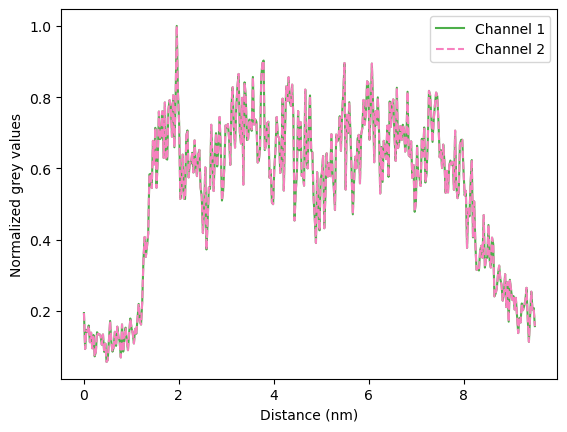

In [131]:
reps = int(np.size(read_csv1,1)/2) #Calculate number of unique line plots

#Extract distance colum and grey values column, remove NaNs from both, and plot the pairs
for a in range(1,2):
    fig = plt.figure()
    dist1 = read_csv1[:,0+(2*a)]
    dist2 = read_csv2[:,0+(2*a)]
    gv1 = read_csv1[:,1+(2*a)]
    gv2 = read_csv2[:,1+(2*a)]
    dist1 = dist1[~np.isnan(dist1)]
    dist2 = dist2[~np.isnan(dist2)]
    gv1 = gv1[~np.isnan(gv1)]
    gv2 = gv2[~np.isnan(gv2)]
    #Normalize the grey values
    gv_max1 = np.max(gv1)
    gv_max2 = np.max(gv2)
    gv_norm1 = gv1/gv_max1
    gv_norm2 = gv2/gv_max2
    plt.plot(dist1, gv_norm1, label='Channel 1', color=CB_color_cycle[0+(2*a)])
    plt.plot(dist2, gv_norm2, label='Channel 2', color=CB_color_cycle[1+(2*a)],linestyle='--')
    plt.legend()
    plt.xlabel('Distance (nm)')
    plt.ylabel('Normalized grey values')
plt.show()

In [132]:
from scipy.signal import find_peaks
#find_peaks searches for local maxima. Distance sets the number of datapoints that must
#be between found peaks
gv_mid = gv_max1/2
peaks = find_peaks(gv1,height=gv_mid)

In [134]:
slope, intercept = np.polyfit(dist1, gv_norm1, 1)
p = np.poly1d(z)


0.009193461677529593


In [120]:
gv_mid

28.3698